Level 2

Task 2: 
- Analyze the distribution of aggregate ratings and determine the most common rating range.
- Calculate the average number of votes received by restaurants.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load the data
df = pd.read_csv('/Users/tilakpatel/Personel/Cognifyz intern/code/Data/Dataset.csv', encoding='utf-8')
df = df.dropna(subset=['Cuisines'])

In [3]:
df_rating = df.copy()

In [4]:
rating_range = {
    0: '0-1',
    1: '1-2',
    2: '2-3',
    3: '3-4',
    4: '4-5',
}

In [5]:
df_rating['rating range'] = df_rating['Aggregate rating'].apply(lambda x: rating_range[int(x)])

In [6]:
df_plot = df_rating.groupby('rating range')['Restaurant ID'].size()

In [7]:
df_plot = pd.DataFrame(df_plot)


In [17]:
df_plot = df_plot.sort_values('Restaurant ID')
df_plot

,Restaurant ID
rating range,
1-2,3
4-5,1378
2-3,1430
0-1,2148
3-4,4583


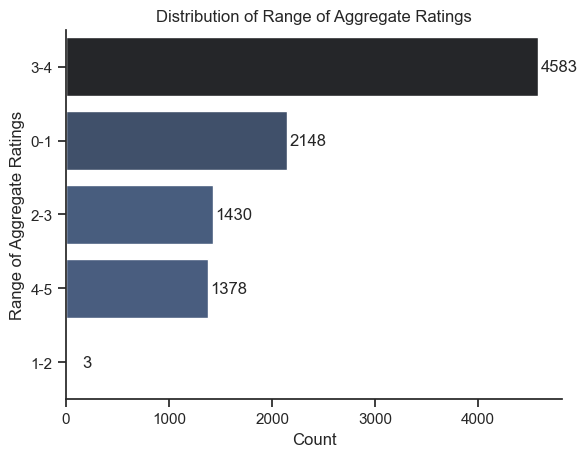

In [18]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='Restaurant ID', y=df_plot.index, hue='Restaurant ID', palette='dark:b_r', legend=False)
plt.title('Distribution of Range of Aggregate Ratings')
plt.ylabel('Range of Aggregate Ratings')
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('Count')
for index, value in enumerate(df_plot['Restaurant ID']):
    plt.text(value+200, index, str(value), ha='center', va='center')
sns.despine()
plt.show()

From the graph above we can concude that most of the restaurants have an aggregate rating between 3-4.

In [37]:
average_votes = df_rating.groupby('Restaurant Name')['Votes'].mean()

In [39]:
average_votes = pd.DataFrame(average_votes.sort_values(ascending=False).head(10))

Top 10 Restaurants with most number of votes.

In [40]:
average_votes

,Votes
Restaurant Name,
Toit,10934.0
Hauz Khas Social,7931.0
Peter Cat,7574.0
Big Brewsky,5705.0
The Black Pearl,5385.0
BarBQ,5288.0
Warehouse Cafe,4914.0
Truffles,4841.0
Mocambo,4464.0
